In [1]:

def d3_armor_reduction(df):
    df_c = df.copy()
    df_c['d3_res_reduction'] = (df_c['armor'] / (df_c['armor'] + df_c['lvl'] * 5)) * 100
    df_c['d3_res_dmg_taken'] = df_c['dpt100'] / 100 * (100 - df_c['d3_res_reduction'])
    return df_c


def lol_res_reduction(df):
    df_c = df.copy()
    lol_multi_cond = [df_c['armor'] < 0, df_c['armor'] >= 0]
    lol_neg_def = 2 - (100 / (100 - df_c['armor']))
    lol_pos_def = 100 / (100 + df_c['armor'])

    df_c['dmg_multi_lol'] = np.select(lol_multi_cond, [lol_neg_def, lol_pos_def])
    df_c['lol_dmg_taken'] = df_c['dmg_multi_lol'] * df_c['dpt100']
    return df_c


def avg_dmg_redu_dodge(df):
    df_c = df.copy()
    df_c['lol_dmg_redu_dodge'] = df_c['lol_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    df_c['d3_dmg_redu_dodge'] = df_c['d3_res_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    return df_c

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from all_more_base_stats import *
f_results = fight_results[fight_results.columns[-(len(cl_df_list)*2):]]


('dex_class', {'starting_pts': 26, 'growth_pts': 12})
('str_class', {'starting_pts': 26, 'growth_pts': 12})
('int_class', {'starting_pts': 26, 'growth_pts': 12})


In [3]:
f_results.apply(lambda row: [(unit.name, round(unit.hp / unit.max_hp * 100, 2)) for unit in row])

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
0,"(str_cl, 34.29)","(str_cl, 39.05)","(int_cl, 28.89)","(str_cl, 10.0)","(int_cl, 19.44)","(int_cl, 13.89)"
1,"(str_cl, 13.82)","(str_cl, 26.18)","(int_cl, 11.63)","(str_cl, 18.55)","(int_cl, 11.63)","(int_cl, 8.84)"
2,"(str_cl, 36.47)","(int_cl, 0.8)","(int_cl, 13.6)","(str_cl, 36.47)","(int_cl, 26.4)","(int_cl, 20.0)"
3,"(str_cl, 26.42)","(str_cl, 20.99)","(int_cl, 1.05)","(str_cl, 8.89)","(str_cl, 8.64)","(dex_cl, 4.24)"
4,"(str_cl, 47.23)","(str_cl, 26.81)","(int_cl, 10.62)","(str_cl, 25.74)","(int_cl, 23.75)","(int_cl, 36.25)"
5,"(str_cl, 31.78)","(str_cl, 19.25)","(dex_cl, 9.3)","(str_cl, 1.31)","(int_cl, 4.23)","(int_cl, 3.66)"
6,"(str_cl, 42.33)","(str_cl, 38.0)","(dex_cl, 8.75)","(dex_cl, 6.25)","(str_cl, 67.33)","(int_cl, 37.44)"
7,"(str_cl, 42.41)","(str_cl, 18.35)","(int_cl, 14.82)","(str_cl, 18.5)","(str_cl, 9.17)","(int_cl, 20.0)"
8,"(str_cl, 27.4)","(str_cl, 37.53)","(dex_cl, 53.45)","(str_cl, 9.32)","(str_cl, 9.04)","(int_cl, 3.91)"
9,"(str_cl, 46.16)","(str_cl, 26.04)","(int_cl, 22.22)","(str_cl, 25.03)","(int_cl, 24.85)","(int_cl, 18.99)"


In [4]:
get_unit_attribute(f_results, 'name').describe()

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
count,30,30,30,30,30,30
unique,2,2,2,2,2,2
top,str_cl,str_cl,dex_cl,str_cl,str_cl,int_cl
freq,23,24,15,19,19,19


In [5]:
# approx turns it took to win
turns_to_win = (get_unit_attribute(f_results, 'ct_to_win') / 100)[1:]  # clock ticks it took to win / 100 ticks (for a turn)
turns_to_win

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
1,15.12,9.72,9.72,7.56,6.48,5.40
2,14.04,11.77,8.56,8.64,6.42,5.35
3,12.84,8.56,8.48,9.63,6.42,5.15
4,12.84,6.42,7.28,8.56,6.24,4.16
5,12.72,8.48,7.00,9.54,7.21,5.15
6,10.60,7.42,7.92,7.92,5.30,5.10
7,11.55,8.40,7.07,10.50,6.30,4.04
8,12.48,7.28,5.76,9.36,7.28,5.00
9,10.40,7.28,6.93,9.36,5.94,3.96
10,13.16,7.21,7.84,9.27,5.15,3.76


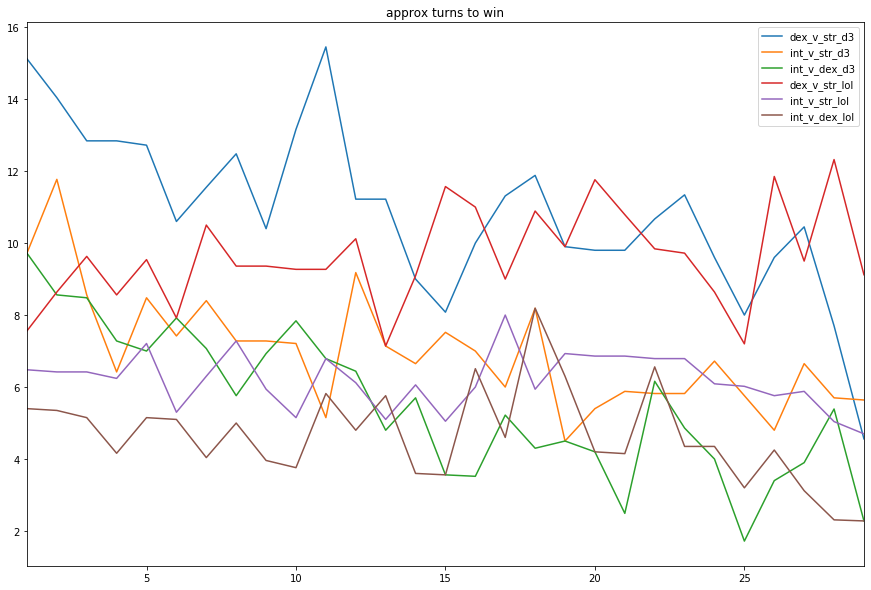

In [6]:

turns_to_win.plot(title='approx turns to win' ,figsize=[15,10])

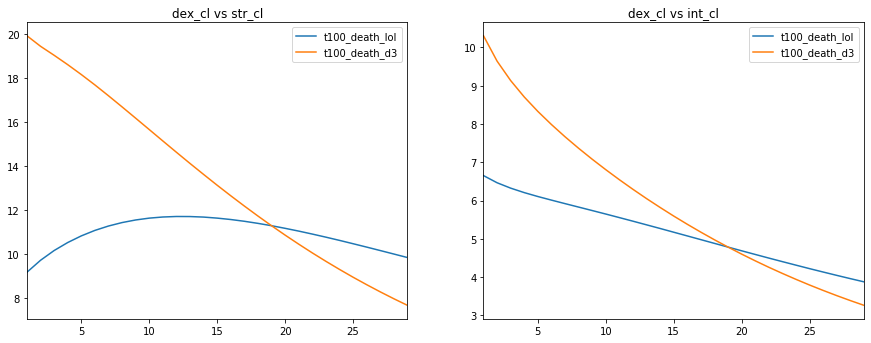

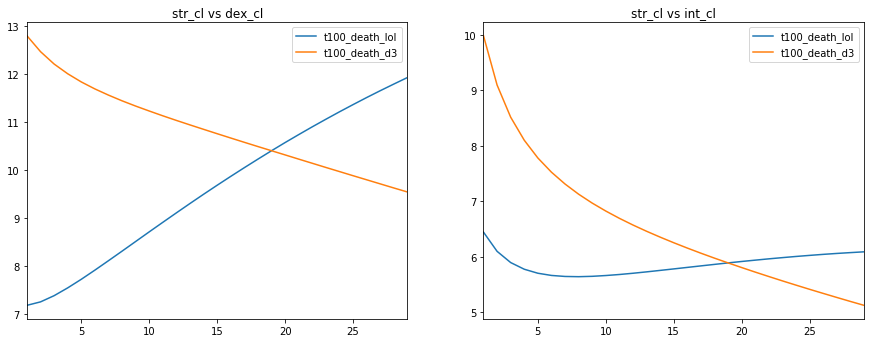

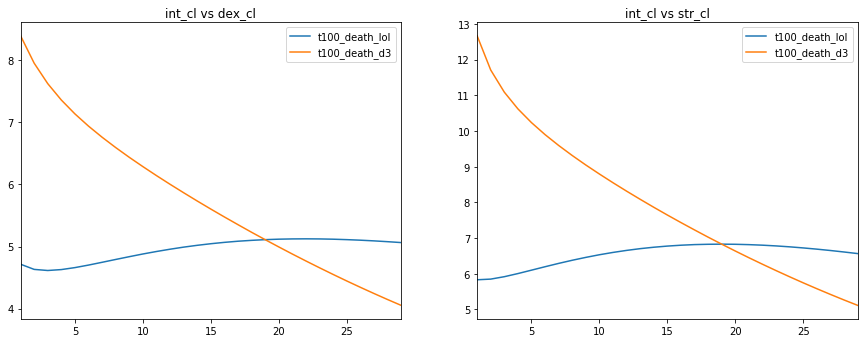

In [7]:
# how many 100clock ticks does it take to kill the defender
for i,attacker in enumerate(cl_df_list):
    cl_df_l_copy = cl_df_list.copy()
    cl_df_l_copy.pop(i)
    
    fig = plt.figure(figsize=[15, 12])
    for n, defender in enumerate(cl_df_l_copy):
        ax = fig.add_subplot(221+n)
        test_df = pd.concat([attacker[['dpt100', 'lvl']], defender[['dodge', 'd3_res_reduction', 'dmg_multi_lol', 'hp', 'armor']]], axis=1)
        
        test_df = d3_armor_reduction(test_df)
        test_df = lol_res_reduction(test_df)
        test_df = avg_dmg_redu_dodge(test_df)
        test_df['t100_death_lol'] = test_df['hp'] / test_df['lol_dmg_redu_dodge']
        test_df['t100_death_d3'] = test_df['hp'] / test_df['d3_dmg_redu_dodge']
        test_df[['t100_death_lol', 't100_death_d3']].iloc[1:].plot(title=attacker.name+' vs '+defender.name, ax=ax)

In [8]:
compare(all_cl_df, ['speed', 'ticks_to_turn'])

,speed_dex,speed_str,speed_int,ticks_to_turn_dex,ticks_to_turn_str,ticks_to_turn_int
0,9.39,9.22,9.22,106.50,108.46,108.46
1,9.52,9.27,9.32,105.04,107.87,107.30
2,9.65,9.32,9.42,103.63,107.30,106.16
3,9.78,9.37,9.52,102.25,106.72,105.04
4,9.91,9.42,9.62,100.91,106.16,103.95
5,10.04,9.47,9.72,99.60,105.60,102.88
6,10.17,9.52,9.82,98.33,105.04,101.83
7,10.30,9.57,9.92,97.09,104.49,100.81
8,10.43,9.62,10.02,95.88,103.95,99.80
9,10.56,9.67,10.12,94.70,103.41,98.81


In [9]:
compare(all_cl_df, ['dodge', 'crit_dmg', 'crit_chan'])

,dodge_dex,dodge_str,dodge_int,crit_dmg_dex,crit_dmg_str,crit_dmg_int,crit_chan_dex,crit_chan_str,crit_chan_int
0,7.617,6.566,6.566,153,138,138,7.5,6.25,6.25
1,8.256,6.781,6.996,163,142,145,8.5,6.75,7.00
2,8.895,6.996,7.426,173,146,152,9.5,7.25,7.75
3,9.534,7.211,7.856,183,150,159,10.5,7.75,8.50
4,10.173,7.426,8.286,193,154,166,11.5,8.25,9.25
5,10.812,7.641,8.716,203,158,173,12.5,8.75,10.00
6,11.451,7.856,9.146,213,162,180,13.5,9.25,10.75
7,12.090,8.071,9.576,223,166,187,14.5,9.75,11.50
8,12.729,8.286,10.006,233,170,194,15.5,10.25,12.25
9,13.368,8.501,10.436,243,174,201,16.5,10.75,13.00


In [10]:
compare(all_cl_df, ['m_dmg_wo_wpn', 'd_dmg_wo_wpn', 'p_dmg_wo_wpn','b_dmg' ,'dpt100'])

,m_dmg_wo_wpn_dex,m_dmg_wo_wpn_str,m_dmg_wo_wpn_int,d_dmg_wo_wpn_dex,d_dmg_wo_wpn_str,d_dmg_wo_wpn_int,p_dmg_wo_wpn_dex,p_dmg_wo_wpn_str,p_dmg_wo_wpn_int,b_dmg_dex,b_dmg_str,b_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,2.4,1.5,9.6,6.9,3.4,3.4,3.4,6.2,2.0,29.47,29.81,43.595,28.77,28.14,41.15
1,4.8,3.0,14.7,9.6,4.7,5.4,4.7,9.6,3.3,36.90,40.09,60.565,37.01,38.22,58.22
2,7.2,4.5,19.8,12.3,6.0,7.4,6.0,13.0,4.6,44.33,50.37,77.535,45.74,48.51,75.98
3,9.6,6.0,24.9,15.0,7.3,9.4,7.3,16.4,5.9,51.75,60.66,94.505,55.02,59.04,94.48
4,12.0,7.5,30.0,17.7,8.6,11.4,8.6,19.8,7.2,59.18,70.94,111.475,64.92,69.80,113.79
5,14.4,9.0,35.1,20.4,9.9,13.4,9.9,23.2,8.5,66.60,81.23,128.455,75.48,80.83,133.97
6,16.8,10.5,40.2,23.1,11.2,15.4,11.2,26.6,9.8,74.02,91.51,145.425,86.76,92.12,155.09
7,19.2,12.0,45.3,25.8,12.5,17.4,12.5,30.0,11.1,81.45,101.80,162.395,98.85,103.69,177.21
8,21.6,13.5,50.4,28.5,13.8,19.4,13.8,33.4,12.4,88.87,112.09,179.365,111.80,115.57,200.42
9,24.0,15.0,55.5,31.2,15.1,21.4,15.1,36.8,13.7,96.30,122.37,196.335,125.68,127.75,224.79


In [11]:
compare(all_cl_df, ['m_dmg', 'p_dmg', 'dpt100'])

,m_dmg_dex,m_dmg_str,m_dmg_int,p_dmg_dex,p_dmg_str,p_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,17.1,15.59,43.595,19.85,29.81,18.305,28.77,28.14,41.15
1,23.7,20.12,60.565,23.42,40.09,22.635,37.01,38.22,58.22
2,30.3,24.66,77.535,27.00,50.37,26.965,45.74,48.51,75.98
3,36.9,29.20,94.505,30.58,60.66,31.285,55.02,59.04,94.48
4,43.5,33.74,111.475,34.15,70.94,35.615,64.92,69.80,113.79
5,50.1,38.27,128.455,37.72,81.23,39.935,75.48,80.83,133.97
6,56.7,42.81,145.425,41.30,91.51,44.265,86.76,92.12,155.09
7,63.3,47.35,162.395,44.88,101.80,48.595,98.85,103.69,177.21
8,69.9,51.89,179.365,48.45,112.09,52.915,111.80,115.57,200.42
9,76.5,56.43,196.335,52.02,122.37,57.245,125.68,127.75,224.79


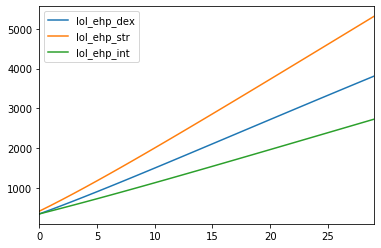

In [12]:
compare(all_cl_df, ['lol_ehp',]).plot()

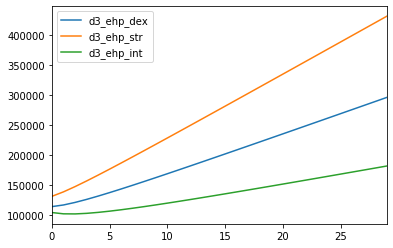

In [13]:
compare(all_cl_df, ['d3_ehp',]).plot()

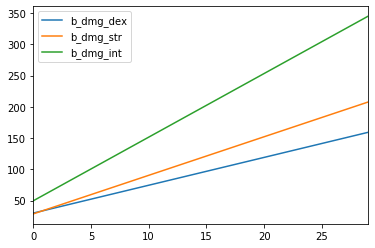

In [14]:
compare(all_cl_df, ['b_dmg',]).plot()

In [8]:
cl_df_l_copy = cl_df_list.copy()

In [9]:
cl_df_l_copy[1]

,lvl,vit,dex,str,int,agility,toughness,u_name,speed,ticks_to_turn,...,armor,dodge,d3_res_reduction,d3_res_dmg_taken,dmg_multi_lol,lol_dmg_taken,lol_dmg_redu_dodge,d3_dmg_redu_dodge,lol_ehp,d3_ehp
0,1,14,8,15,4,8,9,str_cl,9.40,106.38,...,26.0,7.420,83.870968,4.520968,0.793651,22.246032,20.595376,4.185512,1481.843698,59628.753581
1,2,17,9,19,5,9,11,str_cl,9.45,105.82,...,32.5,7.635,76.470588,8.096471,0.754717,25.969811,23.987016,7.478305,1670.078425,60363.563441
2,3,20,10,23,6,10,13,str_cl,9.50,105.26,...,39.0,7.850,72.222222,11.369444,0.719424,29.446043,27.134529,10.476943,1860.753831,62651.445278
3,4,23,11,27,7,11,15,str_cl,9.55,104.71,...,45.5,8.065,69.465649,14.537405,0.687285,32.721649,30.082648,13.364963,2053.499595,65674.198947
4,5,26,12,31,8,12,17,str_cl,9.60,104.17,...,52.0,8.280,67.532468,17.678571,0.657895,35.822368,32.856276,16.214786,2248.008737,69102.419195
5,6,29,13,35,9,13,19,str_cl,9.65,103.63,...,58.5,8.495,66.101695,20.837288,0.630915,38.782334,35.487775,19.067161,2444.024636,72777.917059
6,7,32,14,39,10,14,21,str_cl,9.70,103.09,...,65.0,8.710,65.000000,24.034500,0.606061,41.618182,37.993238,21.941095,2641.331106,76615.270500
7,8,35,15,43,11,15,23,str_cl,9.75,102.56,...,71.5,8.925,64.125561,27.286099,0.583090,44.349854,40.391630,24.850814,2839.744738,80564.298857
8,9,38,16,47,12,16,25,str_cl,9.80,102.04,...,78.0,9.140,63.414634,30.600000,0.561798,46.988764,42.693991,27.803160,3039.108910,84593.588220
9,10,41,17,51,13,17,27,str_cl,9.85,101.52,...,84.5,9.355,62.825279,33.996283,0.542005,49.566396,44.929459,30.815930,3239.289075,88682.468470
